## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Mean
tumor_vol_mean = merge_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [3]:
#Median
tumor_vol_median = merge_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [4]:
#Variance
tumor_vol_var = merge_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [5]:
tumor_vol_std_dev = merge_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_std_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [6]:
tumor_vol_SEM = merge_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_vol_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [7]:
#Summary statistics table for mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = pd.DataFrame({"Tumor Volume Average":tumor_vol_mean, "Tumor Volume Median":tumor_vol_median,
                            "Tumor Volume Variance":tumor_vol_var, "Tumor Volume Standard Deviation":tumor_vol_std_dev,
                            "Tumor Volume SEM":tumor_vol_SEM})
sort_tumors =tumor_volume.sort_values("Tumor Volume Average", ascending = True)
tumor_volume

,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points for Each Treatment Regimen')

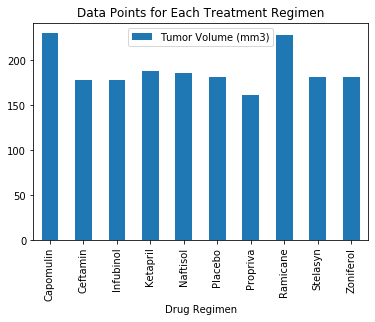

In [8]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
#Using Pandas to chart a DataFrame (Used Matplotlib, Day 2, Activity 2, avg_state_rain for reference)

#Filter the DataFrame down only to those columns to chart
columns_to_chart = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]

data_points = columns_to_chart.groupby(["Drug Regimen"]).agg ({"Tumor Volume (mm3)" : "count"})

#Use DataFrame.plot() in order to create a bar chart of the data
data_points.plot(kind = "bar")
                 
#Set a title for the chart
plt.title("Data Points for Each Treatment Regimen")                 

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Used Matplotlib, Day 2, Activity 4, plotting_groups for reference (Pyplot)

#Create a group based on the values in the "Drug Regimen" column
medication = merge_df.groupby("Drug Regimen")

#Count how many times each Drug Regimen appears in the group
count_medication = medication["Drug Regimen"].count()

count_medication

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

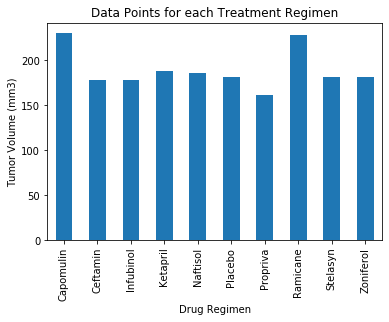

In [10]:
#Create a bar chart based off of the group series from before
count_chart = count_medication.plot(kind="bar")

#Set the xlabel and ylabel 
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Tumor Volume (mm3)")
count_chart.set_title ("Data Points for each Treatment Regimen")                       
plt.show()                      

## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
#Used Matplotlib, Day 2, Activity 5, Stu_BikeTrippin for reference

#Determine the number of female and male mice.(Need to reset index so "Sex" remains in the index list)
gender_df = pd.DataFrame(merge_df.groupby(["Sex"]).count()).reset_index()
gender_df

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [12]:
#Filter the DataFrame down to only those columns to chart

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df

,Sex,Count
0,Female,935
1,Male,958


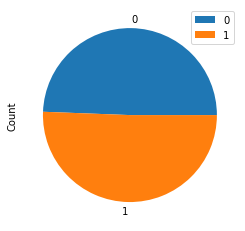

In [13]:
##########Chart the data
gender_df.plot(kind="pie", y = "Count")


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using PYPLOT

#Determine the number of female and male mice
gender_count = (merge_df.groupby(["Sex"]).count())
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


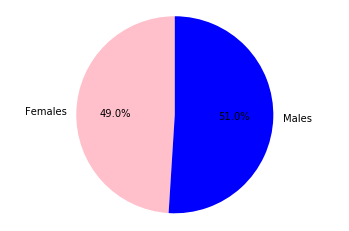

In [15]:
#Set labels
labels = "Females", "Males"

#Set sizes
sizes = [49, 51]

#Set colors for each label
colors = "pink", "blue"

#Create the pie chart using the values listed above
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct = "%1.1f%%", startangle = 90)
ax1.axis("equal")

plt.show()

## Quartiles, outliers and boxplots

In [16]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
#Create Data Frame for "Timepoint" column

greatesttimepoint = merge_df.groupby(["Mouse ID"])
timepoint = greatesttimepoint.max()
timepoint

#final_tumor_vol_df = merge_df.loc[merge_df["Timepoint"] == 45]
#final_tumor_vol_df.head().reset_index()




,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [18]:
#Capomulin Data

#capomulin_regimen = final_tumor_vol_df[final_tumor_vol_df["Drug Regimen"].isin(["Capomulin"])]
#capomulin_regimen.reset_index()
greatesttimepoint = merge_df.groupby(["Mouse ID"])
timepoint = greatesttimepoint.max()
capomulin = timepoint.loc[timepoint["Drug Regimen"] == "Capomulin", :]
capomulintumorvolume = capomulin["Tumor Volume (mm3)"]
capomulintumorvolume

Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
i557    47.685963
i738    45.595685
j119    48.158209
j246    46.408361
l509    48.070452
l897    46.154737
m601    45.000000
m957    46.414518
r157    46.539206
r554    45.781746
r944    47.373423
s185    45.000000
s710    45.000000
t565    46.749006
u364    47.212200
v923    45.704434
w150    45.000000
w914    45.893720
x401    45.473753
y793    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [19]:
#Capomulin Quartiles
# Used Matplotlib, Day 3 Activity 3, Stu_Summary_Stats_Python for reference.

quartiles = capomulintumorvolume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles.loc[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#outlier_tumor_vol = capomulin_regimen.loc[(capomulin_regimen["Tumor Volume (mm3)"] < lower_bound) | capomulin_regimen.loc[(capomulin_regimen["Tumor Volume (mm3)"] > upper_bound)]]
#outlier_tumor_vol                                          

0.25    45.000000
0.50    45.893720
0.75    46.749006
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Tumor Volume (mm3) is: 45.0
The upper quartile of Tumor Volume (mm3) is: 46.74900552
The interquartile range of Tumor Volume (mm3) is: 1.7490055199999972
The the median of Tumor Volume (mm3) is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [20]:
#Ramicane Data

#ramicane_regimen = final_tumor_vol_df[final_tumor_vol_df["Drug Regimen"].isin(["Ramicane"])]
#ramicane_regimen.reset_index()

#ramicane = timepoint.loc[timepoint["Drug Regimen"] == "Ramicane", :]
#ramicanetumorvolume = ramicane["Tumor Volume (mm3)"]
#ramicanetumorvolume

maximum_df = merge_df.groupby(["Mouse ID"])
max_time = maximum_df.max()
ramicanetumorvolume = max_time.loc[max_time["Drug Regimen"] == "Ramicane", :]
ramicanetumorvolume = ramdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
ramicanetumorvolume = ramicanetumorvolume["Tumor Volume (mm3)"]
ramicanetumorvolume

NameError: name 'ramdrug_data_df' is not defined

In [ ]:
#Ramicane Quartiles

quartiles = ramicanetumorvolume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles.loc[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [21]:
#Infubinol Data

#infubinol_regimen = final_tumor_vol_df[final_tumor_vol_df["Drug Regimen"].isin(["Infubinol"])]
#infubinol_regimen.reset_index()
maximum_df = merge_df.groupby(["Mouse ID"])
max_time = maximum_df.max()
infubinol = timepoint.loc[timepoint["Drug Regimen"] == "Infubinol", :]
infubinoltumorvolume = infubinol["Tumor Volume (mm3)"]
infubinoltumorvolume

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
c326    45.000000
c895    60.969711
e476    62.435404
f345    60.918767
i386    67.289621
k483    66.196912
k804    62.117279
m756    47.010364
n671    60.165180
o809    55.629428
o813    45.699331
q132    54.656549
s121    55.650681
v339    46.250112
v719    54.048608
v766    51.542431
w193    50.005138
w584    58.268442
y163    67.685569
z581    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [22]:
#Infubinol Quartiles

quartiles = infubinoltumorvolume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles.loc[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [23]:
#Ceftamin Data

#ceftamin_regimen = final_tumor_vol_df[final_tumor_vol_df["Drug Regimen"].isin(["Ceftamin"])]
#ceftamin_regimen.reset_index()
maximum_df = merge_df.groupby(["Mouse ID"])
max_time = maximum_df.max()
ceftamin = timepoint.loc[timepoint["Drug Regimen"] == "Ceftamin", :]
ceftamintumorvolume = ceftamin["Tumor Volume (mm3)"]
ceftamintumorvolume


Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [24]:
#Ceftamin Quartiles

quartiles = ceftamintumorvolume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles.loc[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


ValueError: Shape of passed values is (175, 1), indices imply (25, 7)

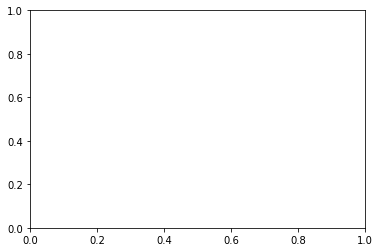

In [25]:
#########??? Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Creftamin is misspelled in the plt.xticks [1,2,3,4] line but when I correct the spelling, I get a huge Value error and the box plots disappear. I can't figure out how to fix it)

all_data = [capomulintumorvolume, ramicanetumorvolume, infubinoltumorvolume, ceftamintumorvolume]

plt.boxplot(all_data,patch_artist=True)
plt.xticks([1,2,3,4],[capomulin, ramicane, infubinol, ceftamine])
plt.ylabel("Tumor Volume")
plt.title("Most Promising Drug Regimens")

plt.show()

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]


In [27]:
#Data for "Mouse ID" m601

mouse_capomulin = capomulin.loc[capomulin["Mouse ID"] == "m601",:]
mouse_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


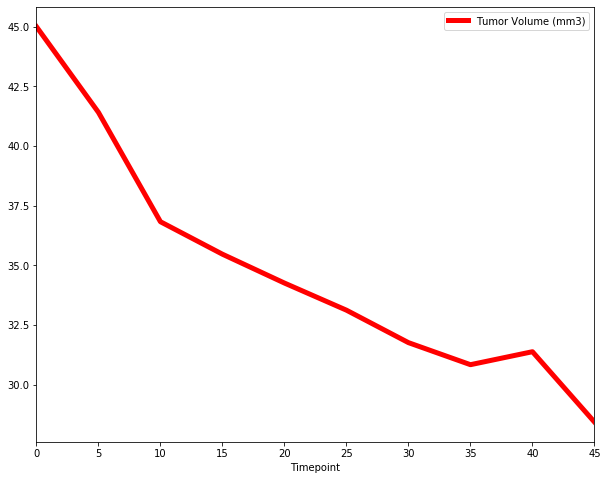

In [28]:
# Isolate "Timepoint" and "Tumor Volume (mm3)" for m601
mouse_capomulin = mouse_capomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Reset the index
mouse_capomulin = mouse_capomulin.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin.set_index('Timepoint').plot(figsize=(10, 8), linewidth=5.0, color='red')


In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Used Matplotlib, Day 3, Activity 8, Fits and Regression for reference

#Isolate "Mouse ID", "Weight", and "Total Volume (mm3)" for all mice on the Capomulin regimen
capomulin = merge_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,k403,16,45.000000
1,k403,16,38.825898
2,k403,16,35.014271
3,k403,16,34.223992
4,k403,16,32.997729


In [30]:
 #Calcualte average tumor volume and mouse weight
mouse_weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

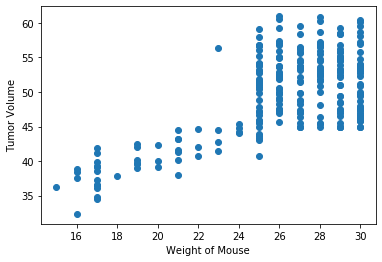

In [31]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

In [32]:
 #Calcualte average tumor volume and mouse weight (x and y values)
mouse_weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

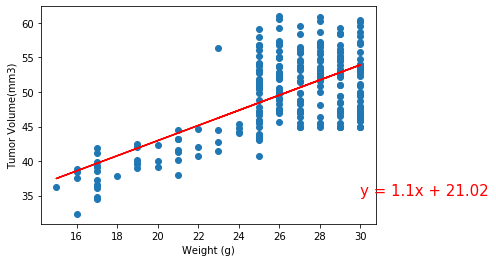

In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(30,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()


In [ ]:
1)Gender representation is about equal, females 49%, males 51%.

In [ ]:
2)Capomulin is an effective regimin in reducing the size of tumors within 45 days. 

In [ ]:
3)Mouse weight and tumor volume are positively correlated. Generally speaking, the bigger the mouse, the larger the tumor was.